<div style="font-family: Arial, Helvetica, sans-serif; max-width:900px; line-height:1.6; color:#222;">
  <h2 style="margin-bottom:0.1rem;">Project Overview — Sentiment Analysis on Product Reviews</h2>

  <p>
    This project teaches a computer to read short product reviews and decide if each review is
    <strong>positive</strong> or <strong>negative</strong>.
  </p>

  <h3 style="margin-top:0.6rem; margin-bottom:0.2rem;">What we use</h3>
  <ul>
    <li><strong>Dataset:</strong> Amazon product reviews (each review has a label: <em>positive</em>, <em>negative</em>, or <em>neutral</em>).</li>
    <li><strong>Model:</strong> Simple machine learning models — <em>Logistic Regression</em> and <em>Naive Bayes</em>.</li>
    <li><strong>Text to numbers:</strong> TF-IDF vectorizer converts words into numbers so the model can learn.</li>
  </ul>

  <h3 style="margin-top:0.6rem; margin-bottom:0.2rem;">What the notebook does (step by step)</h3>
  <ol>
    <li><strong>Load data:</strong> Read reviews and labels into a table.</li>
    <li><strong>Clean text:</strong> Lowercase, remove stop words and punctuation so the text is consistent.</li>
    <li><strong>Combine fields:</strong> Use both title and summary for better context (if available).</li>
    <li><strong>Convert to numbers:</strong> Use TF-IDF so words become numerical features.</li>
    <li><strong>Train models:</strong> Fit Logistic Regression and Naive Bayes on the training set.</li>
    <li><strong>Evaluate:</strong> Measure accuracy, precision, recall and show a classification report.</li>
    <li><strong>Visualize:</strong> Show top positive/negative words and word clouds to understand what the model learns.</li>
    <li><strong>Try it:</strong> Enter your own review text and get an instant prediction (positive or negative).</li>
  </ol>

  <h3 style="margin-top:0.6rem; margin-bottom:0.2rem;">Why this is useful</h3>
  <p>
    Companies use this to understand what customers like and what they do not. For learning, it shows how text can be turned into numbers and used with simple, fast models.
  </p>

  <h3 style="margin-top:0.6rem; margin-bottom:0.2rem;">How to run this notebook (quick)</h3>
  <ol>
    <li>Install requirements: <code>pip install -r requirements.txt</code> or <code>pip install pandas scikit-learn matplotlib wordcloud</code>.</li>
    <li>Make sure the data file (for example <code>sentiment.csv</code>) is in the same folder as the notebook.</li>
    <li>Run cells from top to bottom. The training cell will take the longest time.</li>
    <li>To test your own review, find the "predict" cell, write your text, and run it — the model prints Positive (1) or Negative (0).</li>
  </ol>

  <h3 style="margin-top:0.6rem; margin-bottom:0.2rem;">Files in this repo</h3>
  <ul>
    <li><code>notebook.ipynb</code> — main notebook with all code and visuals.</li>
    <li><code>sentiment.csv</code> — the labeled dataset of reviews.</li>
    <li><code>README.md</code> — project description and instructions.</li>
  </ul>

  <p style="margin-top:0.6rem; color:#555;">
    Simple language, clear steps — this notebook is made so you can learn quickly and test your own reviews in seconds.
  </p>
</div>


In [89]:
# importing all the necessary libraries that we might need in our model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud

In [90]:
#  Loading the data set
data = pd.read_csv('/content/sentiment.csv', encoding='ISO-8859-1')

/tmp/ipython-input-2320604338.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/sentiment.csv', encoding='ISO-8859-1')


In [91]:
#  Checking our data
data.head()

,ProductName,ProductPrice,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,Useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,ok ok product,neutral


<h2>We are droping extra columns that we donot require or those who have no part in binary classification.

In [92]:
data = data[['Review' , 'Summary','Sentiment']]

In [93]:
data.head()

,Review,Summary,Sentiment
0,Super!,great cooler excellent air flow and for this p...,positive
1,Awesome,best budget 2 fit cooler nice cooling,positive
2,Fair,the quality is good but the power of air is de...,positive
3,Useless product,very bad product its a only a fan,negative
4,Fair,ok ok product,neutral


<h2> Combining the data of both Review and Summary into one to make it a review and then Sentiment col will classify it as positive or negative

In [94]:
# 3. Combine 'Review' and 'Summary' into one text field
data['full_text'] = data['Review'].astype(str) + " " + data['Summary'].astype(str)

In [95]:
data.head()

,Review,Summary,Sentiment,full_text
0,Super!,great cooler excellent air flow and for this p...,positive,Super! great cooler excellent air flow and for...
1,Awesome,best budget 2 fit cooler nice cooling,positive,Awesome best budget 2 fit cooler nice cooling
2,Fair,the quality is good but the power of air is de...,positive,Fair the quality is good but the power of air ...
3,Useless product,very bad product its a only a fan,negative,Useless product very bad product its a only a fan
4,Fair,ok ok product,neutral,Fair ok ok product


In [96]:
# As a new col created contain both review and Summary so we are updating the datset
data = data[['full_text','Sentiment']]

In [97]:
data.head()

,full_text,Sentiment
0,Super! great cooler excellent air flow and for...,positive
1,Awesome best budget 2 fit cooler nice cooling,positive
2,Fair the quality is good but the power of air ...,positive
3,Useless product very bad product its a only a fan,negative
4,Fair ok ok product,neutral


<h2> Currently our task is to do a binary classification so we will only use positive and negative and we will remove those with neutral

In [98]:
# 4. Keep only positive/negative for binary classification
data = data[data['Sentiment'].isin(['positive', 'negative'])]

In [99]:
data.head()

,full_text,Sentiment
0,Super! great cooler excellent air flow and for...,positive
1,Awesome best budget 2 fit cooler nice cooling,positive
2,Fair the quality is good but the power of air ...,positive
3,Useless product very bad product its a only a fan,negative
5,Awesome the cooler is really fantastic and pro...,positive


<h2>We are doing binary classification and here positive and negative are strings so we will replace them with 1 , 0 to make whole col int type

In [147]:
# Map positive to 1 and negative to 0
data["Sentiment"] = data["Sentiment"].map({"positive": 1, "negative": 0})


In [101]:
data['Sentiment'].unique()

array([1, 0])

In [102]:
data['Sentiment'].value_counts()


,count
Sentiment,
1,111103
0,41956


In [103]:
data.head()

,full_text,Sentiment
0,Super! great cooler excellent air flow and for...,1
1,Awesome best budget 2 fit cooler nice cooling,1
2,Fair the quality is good but the power of air ...,1
3,Useless product very bad product its a only a fan,0
5,Awesome the cooler is really fantastic and pro...,1


In [104]:
data.tail()

,full_text,Sentiment
171374,Best in the market! its very awesome productby...,1
171375,Must buy! awesome product and clear sound just...,1
171376,Perfect product! good,1
171377,Slightly disappointed lot of echo when recording,0
171378,Moderate it was not that good as i expected be...,0


<h2> Train test split as necessary libraries are already added in the first cell so no need for that

In [105]:
# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data['full_text'], data['Sentiment'],
    test_size=0.2, random_state=42
)

<h3>Text Vectorization with TF-IDF</h3>
<p>
In this step, we convert our text reviews into numerical form using
<strong>TF-IDF Vectorization</strong> (Term Frequency - Inverse Document Frequency).
This helps our model understand text data by giving more weight to
important words and less weight to common words.
</p>
<ul>
    <li><code>stop_words='english'</code>: Removes common English words like "the", "is", "and" that don't add much meaning.</li>
    <li><code>lowercase=True</code>: Converts all words to lowercase for consistency.</li>
    <li><code>max_df=0.9</code>: Ignores words that appear in more than 90% of reviews, as they are too common.</li>
</ul>
<p>
We use <code>fit_transform</code> on the training data to learn the vocabulary and transform it,
and <code>transform</code> on the test data to apply the same transformation without re-learning the vocabulary.
</p>


In [106]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, max_df=0.9)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [107]:
X_test_vec

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 187207 stored elements and shape (30612, 36325)>

<h2> Training and testing the model

In [108]:
# 7. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_vec, y_train)
y_pred_lr = log_reg.predict(X_test_vec)

In [154]:
# Comparing different metrices
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9572063243172612
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      8373
           1       0.96      0.98      0.97     22239

    accuracy                           0.96     30612
   macro avg       0.95      0.94      0.95     30612
weighted avg       0.96      0.96      0.96     30612



In [110]:
# Accuracy of our trained model
accuracy = accuracy_score(y_test, y_pred_lr)
accuracy

0.9573043251012675

In [111]:
X_test_vec

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 187207 stored elements and shape (30612, 36325)>

<h2> Checking my model by giving it a random review

In [112]:
# Example review
my_review = ["It is very Bad"]

# Step 1: Convert to vector (use the same vectorizer you trained with)
my_review_vec = vectorizer.transform(my_review)

# Step 2: Predict
prediction = log_reg.predict(my_review_vec)

# Step 3: Show result
if prediction[0] == 1:
    print("Predicted Sentiment: Positive (1)")
else:
    print("Predicted Sentiment: Negative (0)")


Predicted Sentiment: Positive (1)


<h2> the output is wrong so i will try to add some rows in the dat set and train it again

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153059 entries, 0 to 171378
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   full_text  153059 non-null  object
 1   Sentiment  153059 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.5+ MB


In [151]:
for i in range(100):
    data.loc[len(data)] = ["Very bad", 0]
    data.loc[len(data)] = ["not good", 0]


In [128]:
# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data['full_text'], data['Sentiment'],
    test_size=0.2, random_state=42
)

In [129]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, max_df=0.9)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [130]:
# 7. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_vec, y_train)
y_pred_lr = log_reg.predict(X_test_vec)

In [131]:
accuracy = accuracy_score(y_test, y_pred_lr)
accuracy

0.9572063243172612

<h2> After repeating above steps lets try a review

In [152]:
# let us take same review as before to check the improvement
my_review = ["The product is bad and not good"]

#  Converting to vector
my_review_vec = vectorizer.transform(my_review)

#  Predicting our review
prediction = log_reg.predict(my_review_vec)


if prediction[0] == 1:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative)")


Predicted Sentiment: Negative)


<h2> So now it is doing fine

In [138]:
# Example reviews
reviews = [
    "The product is bad and not good",
    "Absolutely amazing quality, loved it!",
    "Terrible build, broke in a week",
    "Fantastic value for money",
    "Worst purchase I have ever made",
    "Pretty decent for the price",
    "I am very disappointed with this",
    "Exceeded my expectations!",
    "Not worth the money at all",
    "I am happy with the product"
]

# Convert to vectors (using the SAME vectorizer as before)
reviews_vec = vectorizer.transform(reviews)

# Predict sentiments
predictions = log_reg.predict(reviews_vec)

# Store results
results = []
for review, pred in zip(reviews, predictions):
    if pred == 1:
        results.append((review, "Positive (1)"))
    else:
        results.append((review, "Negative (0)"))

# Display results
for r in results:
    print(r)


('The product is bad and not good', 'Negative (0)')
('Absolutely amazing quality, loved it!', 'Positive (1)')
('Terrible build, broke in a week', 'Negative (0)')
('Fantastic value for money', 'Positive (1)')
('Worst purchase I have ever made', 'Negative (0)')
('Pretty decent for the price', 'Positive (1)')
('I am very disappointed with this', 'Negative (0)')
('Exceeded my expectations!', 'Negative (0)')
('Not worth the money at all', 'Positive (1)')
('I am happy with the product', 'Positive (1)')


<h2>Now using another algorithm which is Naive Bayes

In [153]:
# Now using another algorithm which is Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9475042467006403
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      8373
           1       0.95      0.98      0.96     22239

    accuracy                           0.95     30612
   macro avg       0.95      0.92      0.93     30612
weighted avg       0.95      0.95      0.95     30612



<h2> It is giving us accuracy of more then 94%

In [135]:
accuracy1 = accuracy_score(y_test, y_pred_nb)
accuracy1

0.9475042467006403

<h2> Saving the updated and clean data set

In [140]:
# Save updated dataset to CSV
data.to_csv("updated_dataset.csv", index=False)

# Download file
from google.colab import files
files.download("updated_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h2> Now we will extract some of the key words that is telling our model whether our review is positive or negative  and listiing those

In [143]:
# firstly we will get feature names from vectorizer
feature_names = vectorizer.get_feature_names_out()

# after that we are getting coefficients from model
coefficients = log_reg.coef_[0]

# Top 30 positive words will be stored
top_positive_idx = np.argsort(coefficients)[-30:]
top_positive_words = feature_names[top_positive_idx]

# Top 20 negative words will be stored
top_negative_idx = np.argsort(coefficients)[:20]
top_negative_words = feature_names[top_negative_idx]

print("Top Positive Words:")
print(top_positive_words)

print("\nTop Negative Words:")
print(top_negative_words)


Top Positive Words:
['buy' 'mind' 'fantastic' 'easy' 'value' 'superb' 'beautiful' 'perfect'
 'choice' 'loved' 'penny' 'nice' 'thank' 'pretty' 'amazing' 'delightful'
 'thanks' 'great' 'love' 'best' 'classy' 'brilliant' 'wonderful' 'super'
 'excellent' 'wow' 'fabulous' 'terrific' 'awesome' 'highly']

Top Negative Words:
['worst' 'poor' 'waste' 'terrible' 'useless' 'disappointed' 'hated'
 'damaged' 'low' 'bad' 'worthless' 'moderate' 'dirty' 'recommended'
 'unsatisfactory' 'horrible' 'broken' 'dont' 'problem' 'hard']


<h2>Making some visualizations of our words that are mostly used that are telling our model or we can say adding weight to the decision of our model about the review (Either its positive or negative)

/tmp/ipython-input-4283509544.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pos_values, y=top_pos_words, palette="Greens_r")
/tmp/ipython-input-4283509544.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neg_values, y=top_neg_words, palette="Reds_r")


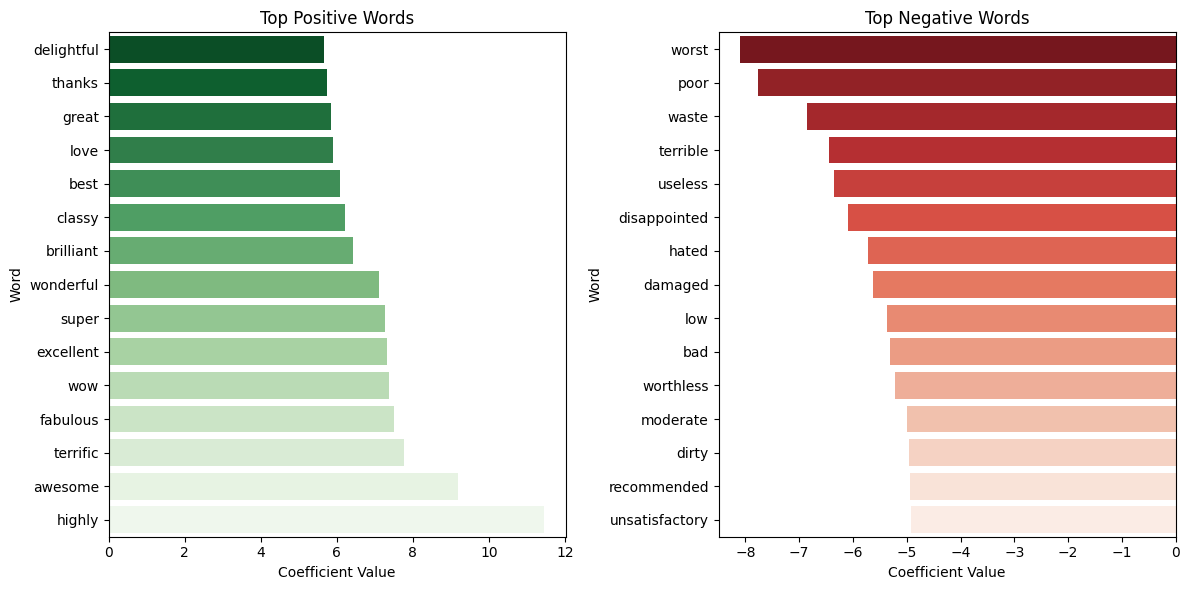

In [146]:
# Top 15 positive words
top_pos_idx = np.argsort(coefficients)[-15:]
top_pos_words = feature_names[top_pos_idx]
top_pos_values = coefficients[top_pos_idx]

# Top 15 negative words
top_neg_idx = np.argsort(coefficients)[:15]
top_neg_words = feature_names[top_neg_idx]
top_neg_values = coefficients[top_neg_idx]

# Create subplots
plt.figure(figsize=(12, 6))

# Positive words
plt.subplot(1, 2, 1)
sns.barplot(x=top_pos_values, y=top_pos_words, palette="Greens_r")
plt.title("Top Positive Words")
plt.xlabel("Coefficient Value")
plt.ylabel("Word")

# Negative words
plt.subplot(1, 2, 2)
sns.barplot(x=top_neg_values, y=top_neg_words, palette="Reds_r")
plt.title("Top Negative Words")
plt.xlabel("Coefficient Value")
plt.ylabel("Word")

plt.tight_layout()
plt.show()
